In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100

In [2]:
train_data = pd.read_pickle('df_income_learn.pkl')
test_data = pd.read_pickle('df_income_test.pkl')

df_income_learn = train_data.copy()
df_income_test = test_data.copy()

### Next step is to examine the continuous and categorical variables.

In [3]:
# There are 7 continuous variables, plus income (categorical)
continuous_vars = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year', 'income']

In [4]:
from eda import Visualizations

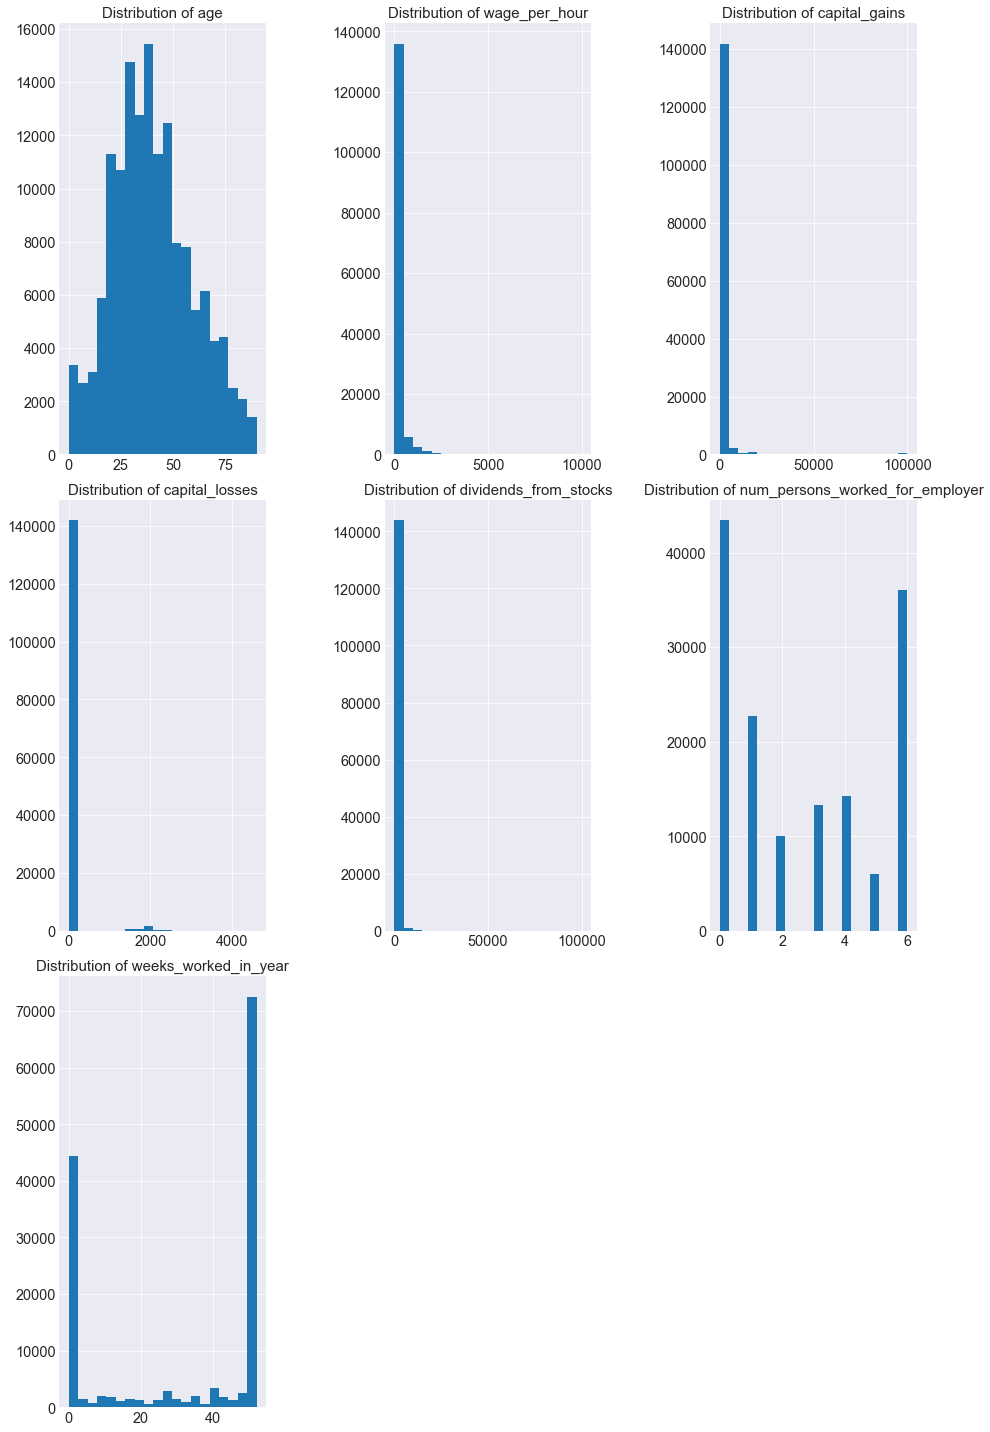

In [5]:
Visualizations(df_income_learn, continuous_vars).histogram()

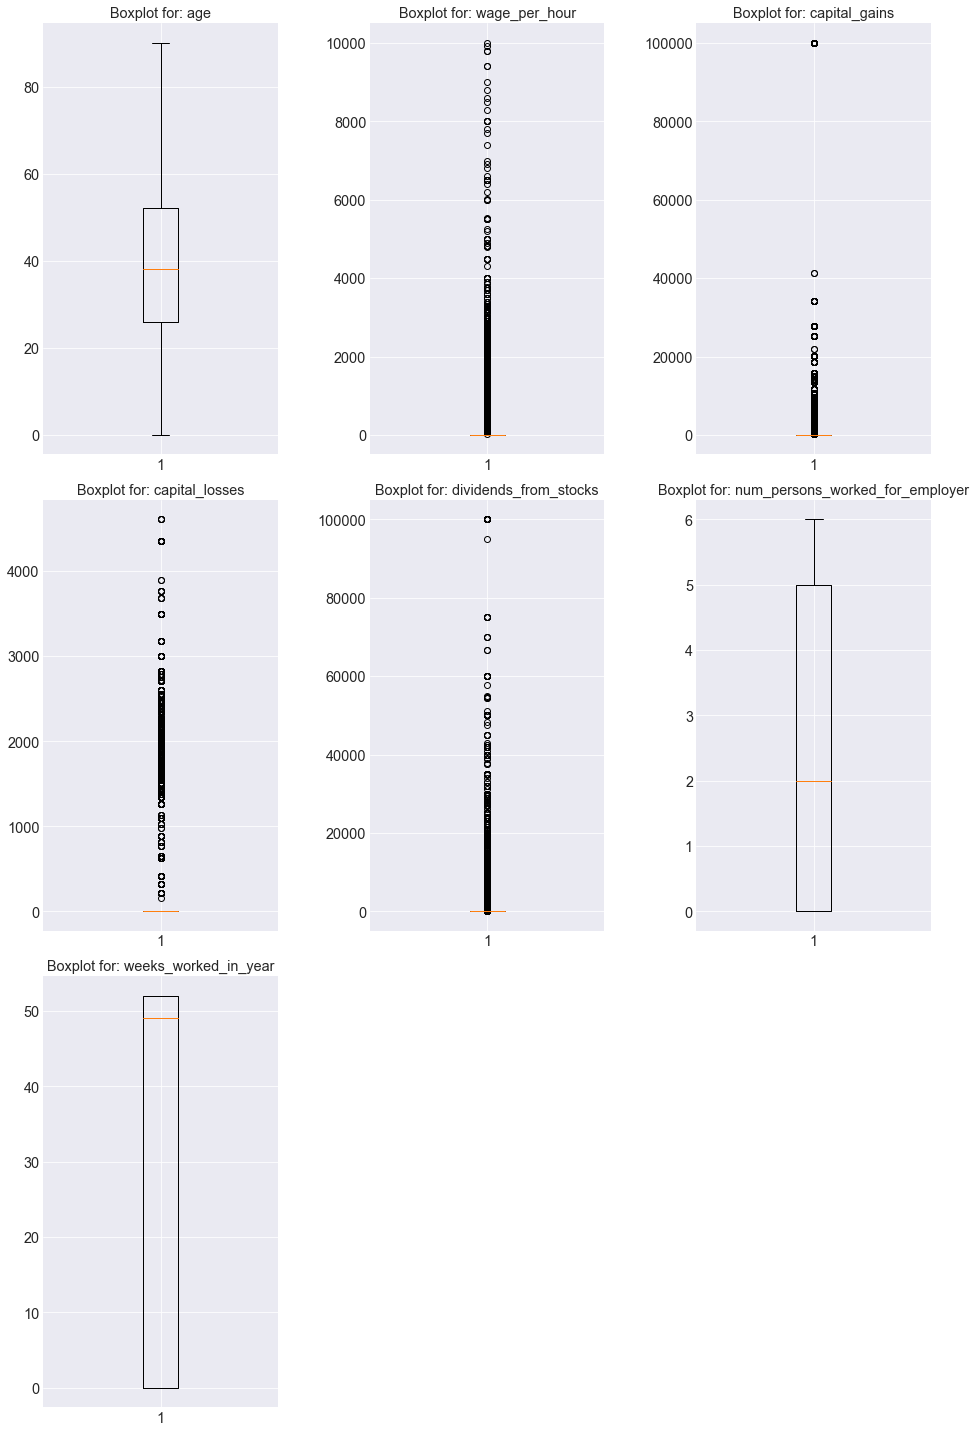

In [6]:
Visualizations(df_income_learn, continuous_vars).boxplots()

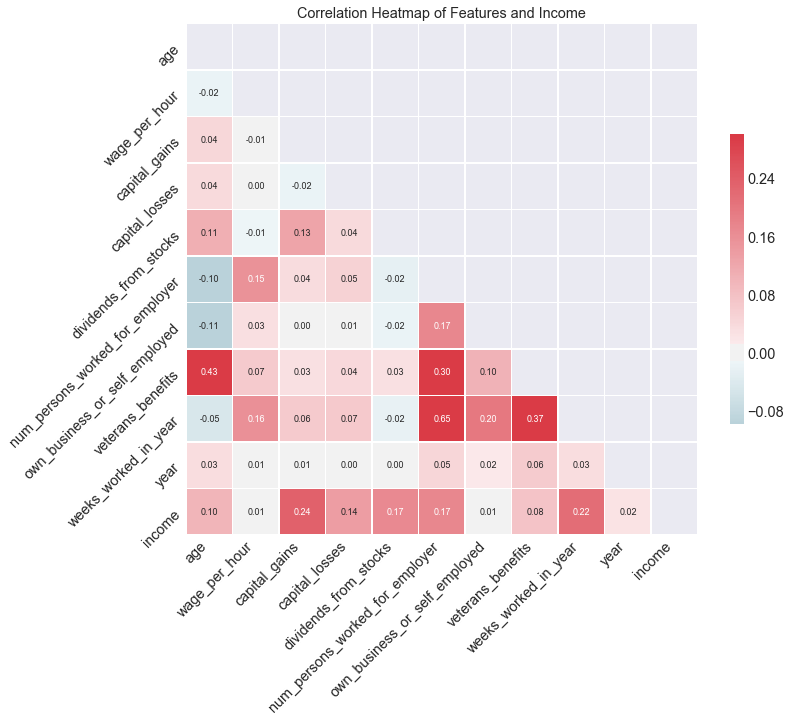

In [10]:
Visualizations(df_income_learn, continuous_vars).heatmap()

In [7]:
# Correlations with continuous variables and income
df_income_learn.corr()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
age,1.000000,-0.018280,0.041888,0.039679,0.109899,-0.098116,-0.112722,0.430138,-0.046860,0.034872,0.099323
wage_per_hour,-0.018280,1.000000,-0.008026,0.000852,-0.013111,0.154180,0.031591,0.065058,0.157208,0.007659,0.005708
capital_gains,0.041888,-0.008026,1.000000,-0.017469,0.128794,0.035794,0.004465,0.028941,0.064104,0.008409,0.235547
capital_losses,0.039679,0.000852,-0.017469,1.000000,0.037827,0.051360,0.008548,0.040991,0.067248,0.003669,0.137047
dividends_from_stocks,0.109899,-0.013111,0.128794,0.037827,1.000000,-0.024851,-0.016517,0.029333,-0.023100,0.004310,0.169436
num_persons_worked_for_employer,-0.098116,0.154180,0.035794,0.051360,-0.024851,1.000000,0.173578,0.301391,0.654361,0.046318,0.172495
own_business_or_self_employed,-0.112722,0.031591,0.004465,0.008548,-0.016517,0.173578,1.000000,0.102673,0.197774,0.016302,0.011260
veterans_benefits,0.430138,0.065058,0.028941,0.040991,0.029333,0.301391,0.102673,1.000000,0.365768,0.061099,0.076643
weeks_worked_in_year,-0.046860,0.157208,0.064104,0.067248,-0.023100,0.654361,0.197774,0.365768,1.000000,0.033413,0.217067
year,0.034872,0.007659,0.008409,0.003669,0.004310,0.046318,0.016302,0.061099,0.033413,1.000000,0.023856


In [5]:
df_income_learn_cont = pd.DataFrame([df_income_learn.pop(x) for x in continuous_vars]).T
df_income_learn_cont.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,income
1,58,0,0,0,0,1,52,0
2,18,0,0,0,0,0,0,0
5,48,1200,0,0,0,1,52,0
6,42,0,5178,0,0,6,52,0
7,28,0,0,0,0,4,30,0


In [12]:
df_income_learn_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,income
count,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000
mean,40.049946,75.850915,594.886230,51.011463,268.787709,2.648776,31.365046,0.084733
std,19.047693,319.180793,5487.018219,316.587798,2313.427671,2.395149,23.437004,0.278485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,49.000000,0.000000
75%,52.000000,0.000000,0.000000,0.000000,0.000000,5.000000,52.000000,0.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000,1.000000


In [6]:
df_income_learn.columns

Index(['class_of_worker', 'education', 'enroll_in_edu_inst_last_wk',
       'marital_stat', 'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'tax_filer_stat', 'region_of_previous_residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'family_members_under_18',
       'country_of_birth_father', 'country_of_birth_mother',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits',
       'year'],
      dtype='object')

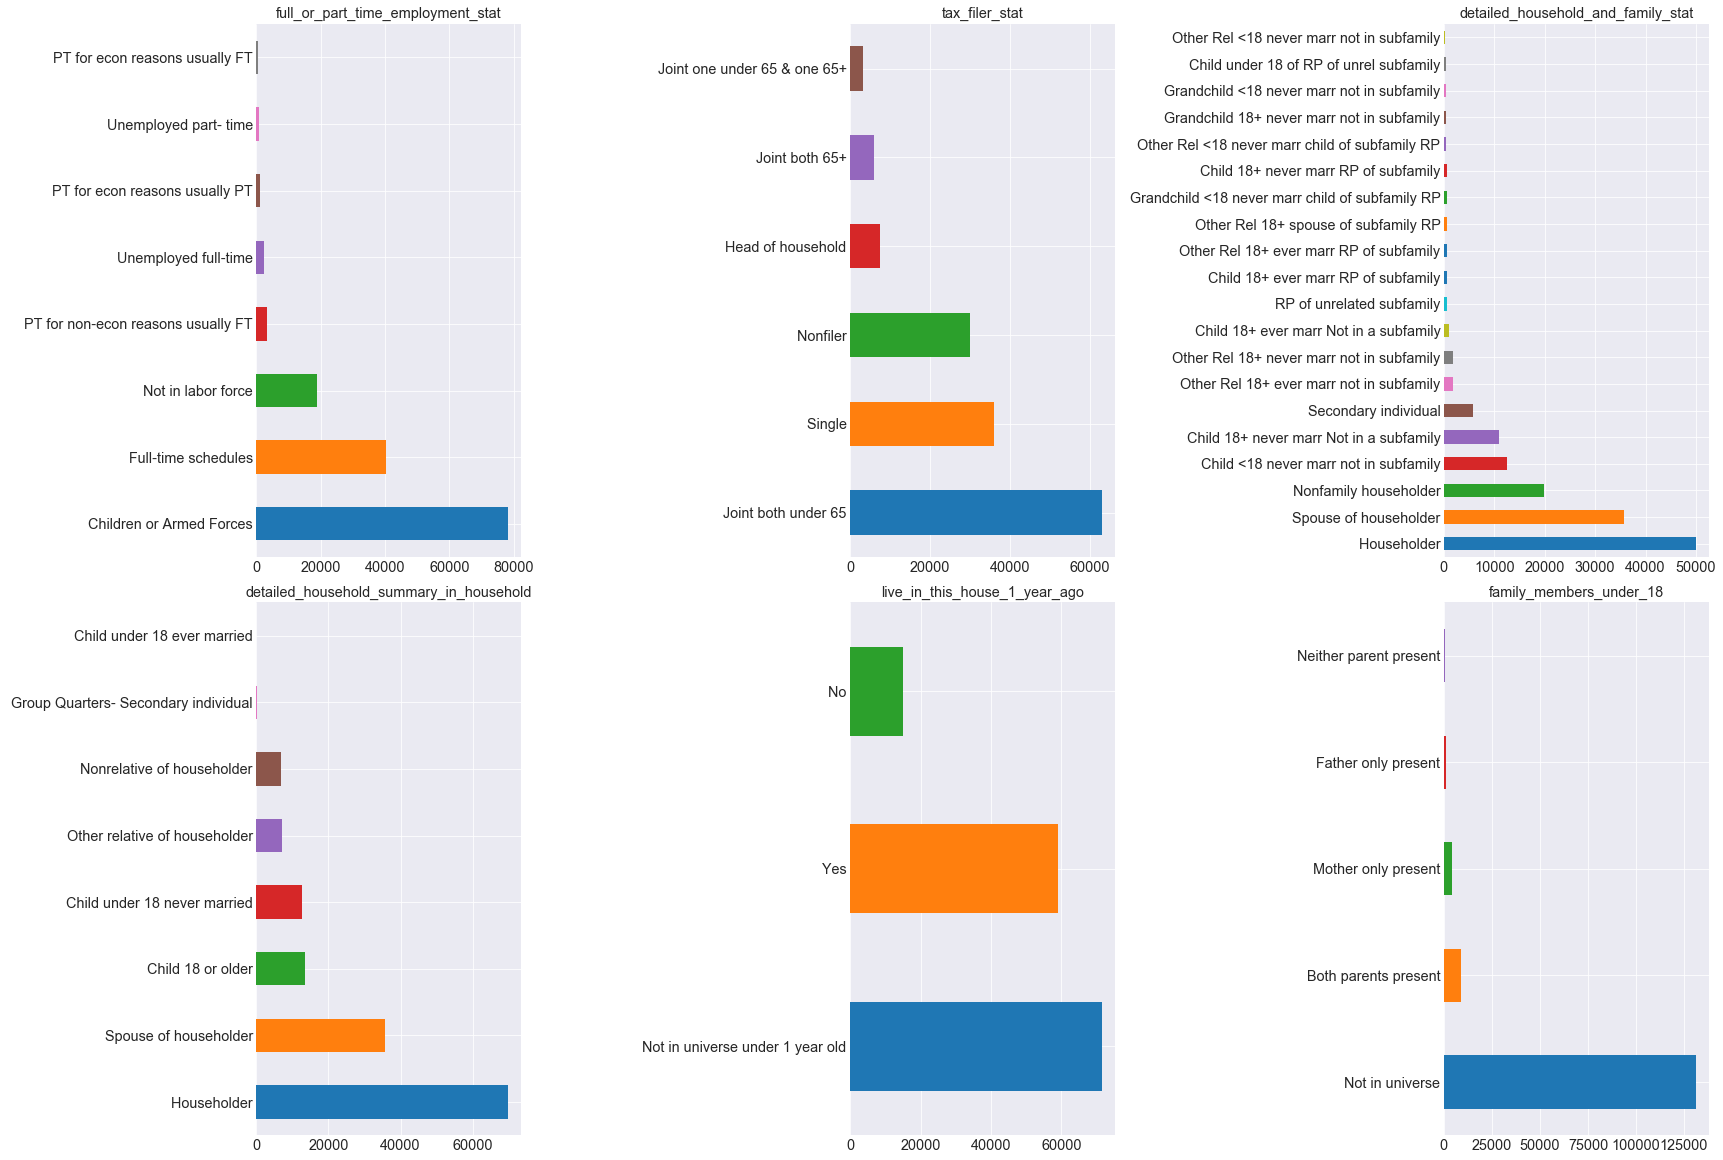

In [8]:
cat_vars = ['full_or_part_time_employment_stat', 'tax_filer_stat', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'live_in_this_house_1_year_ago', 'family_members_under_18']
Visualizations(df_income_learn, cat_vars).categorical_bars()

In [156]:
# Now see what the categorical variables are like
df_income_learn.head()

for column in df_income_learn:
    print(f"Unique values for {column}: {df_income_learn[column].unique()}")


Unique values for class_of_worker: [' Self-employed-not incorporated' ' Not in universe' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
Unique values for education: [' Some college but no degree' 'high_school_no_graduate'
 ' Bachelors degree(BA AB BS)' ' High school graduate' ' Children'
 ' Masters degree(MA MS MEng MEd MSW MBA)' 'up_to_6th_grade'
 ' Associates degree-academic program' ' 7th and 8th grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' Doctorate degree(PhD EdD)']
Unique values for enroll_in_edu_inst_last_wk: [' Not in universe' ' High school' ' College or university']
Unique values for marital_stat: [' Divorced' ' Never married' ' Married-civilian spouse present'
 ' Widowed' ' Separated' ' Married-spouse absent'
 ' Married-A F spouse present']
Unique values for major_industry_code: [' Construction' ' Not in universe or children' ' Entertainmen

In [157]:
# create dummy variables
df_income_learn_with_dummies = pd.get_dummies(df_income_learn.astype(str))
df_income_learn_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145776 entries, 1 to 199522
Columns: 399 entries, class_of_worker_ Federal government to year_95
dtypes: uint8(399)
memory usage: 61.6 MB


In [158]:
df_merged = pd.concat([df_income_learn_cont, df_income_learn_with_dummies], axis=1)

In [159]:
df_merged.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,...,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95
1,58,0.000000,0.00000,0.0,0.0,1,52,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,18,0.000000,0.00000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
5,48,75.850915,0.00000,0.0,0.0,1,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,

#### Now that we have combined continuous and dummy coded categorical variables, we have high dimensionality. We can use sklearn PCA to reduce.

#### We will apply PCA and kFolds cross validation. Features will not have to be standardized because PCA will do that automatically.

In [92]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [160]:
X = df_merged.values
y = income_learn_label.values

In [161]:
X.shape

(145776, 406)

In [162]:
y.shape

(145776,)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
X_train[:5]

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [25.,  0.,  0., ...,  1.,  0.,  1.],
       [22.,  0.,  0., ...,  1.,  1.,  0.],
       [54.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [164]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
model = LogisticRegression()
model.fit(X_train_std, y_train)
preds = model.predict(X_test_std)
print(accuracy_score(preds, y_test))

0.9170508176928986


PCA actually reduced accuracy by around .15

In [168]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_std = pca.transform(X_train)
X_test_std = pca.transform(X_test)

In [166]:
import math
from sklearn.metrics import mean_squared_error as mse

kfold = KFold(n_splits=5, shuffle=True)

accuracies = []
f1s = []
rmse = []

for train_index, test_index in kfold.split(X_train_std):
    model = LogisticRegression()
    model.fit(X[train_index], y[train_index])
    y_predict = model.predict(X[test_index])
    y_true = y[test_index]
    rmse_scores = math.sqrt(mse(y_predict, y_true))
    accuracies.append(accuracy_score(y_true, y_predict))
    rmse.append(rmse_scores)
    f1s.append(f1_score(y_true, y_predict))

print(f"accuracy: {np.average(accuracies)}")
print(f"f1: {np.average(f1s)}")
print(f"rmse: {np.average(rmse)}")

/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

accuracy: 0.9273497224021436
f1: 0.40477221994869306
rmse: 0.26953211638629415


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [127]:
rf_accuracies = []
# rf_precisions = []
# rf_recalls = []
rf_f1s = []
rf_rmse = []

for train_index, test_index in kfold.split(X_train_std):
    model = RandomForestClassifier()
    model.fit(X[train_index], y[train_index])
    y_predict = model.predict(X[test_index])
    y_true = y[test_index]
    rmse_scores = math.sqrt(mse(y_predict, y_true))
    rf_accuracies.append(accuracy_score(y_true, y_predict))
    #rf_precisions.append(precision_score(y_true, y_predict))
    #rf_recalls.append(recall_score(y_true, y_predict))
    rf_rmse.append(rmse_scores)
    rf_f1s.append(f1_score(y_true, y_predict))
print(f"accuracy: {np.average(rf_accuracies)}")
#print(f"precision: {np.average(rf_precisions)}")
#print(f"recall: {np.average(rf_recalls)}")
print(f"f1: {np.average(rf_f1s)}")
print(f"rmse: {np.average(rf_rmse)}")

accuracy: 0.9360114338149913
f1: 0.496937926325504
rmse: 0.2529492769966414


In [139]:
#feature_importances = list(zip(np.asarray(df_merged.columns), model.feature_importances_))
feat_importances = pd.Series(model.feature_importances_, index=df_merged.columns)

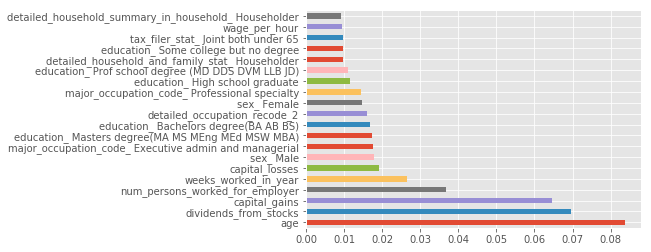

In [142]:
feat_importances.nlargest(20).plot(kind='barh')